In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
df = pd.read_excel('dataset/starbucks_2years.xlsx')
df.head()
df.columns

Index(['date', 'temperature', 'humidity', 'precipitation', 'iced_americano',
       'hot_americano', 'iced_latte', 'hot_latte', 'shaved_ice'],
      dtype='object')

### 상관관계 분석
- 온도 및 기상 요소와 주요 음료판매량 간의 상관관계 분석
- 상관관계는 두 변수간 선형적 관계의 강도와 방향을 나타내며 1에 가까울수록 강한 양의 상관관계, -1에 가까울 수록 음의 상관관계를 의미함.

In [8]:
# 상관계수 계산
cols = ['temperature', 'iced_americano',
       'hot_americano', 'iced_latte', 'hot_latte', 'shaved_ice']
corr = df[cols].corr()
print(corr)

                temperature  iced_americano  hot_americano  iced_latte  \
temperature        1.000000        0.872653      -0.890418    0.898375   
iced_americano     0.872653        1.000000      -0.764529    0.783095   
hot_americano     -0.890418       -0.764529       1.000000   -0.796553   
iced_latte         0.898375        0.783095      -0.796553    1.000000   
hot_latte         -0.888817       -0.771234       0.801813   -0.787807   
shaved_ice         0.894616        0.779937      -0.788928    0.802872   

                hot_latte  shaved_ice  
temperature     -0.888817    0.894616  
iced_americano  -0.771234    0.779937  
hot_americano    0.801813   -0.788928  
iced_latte      -0.787807    0.802872  
hot_latte        1.000000   -0.795299  
shaved_ice      -0.795299    1.000000  


### **2. 온도 vs 음료 판매량 산점도 및 추세선 시각화**
- `sns.scatterplot` 은 분포를 보여줌.
- `sns.regplot`은 추세선을 보여줌.

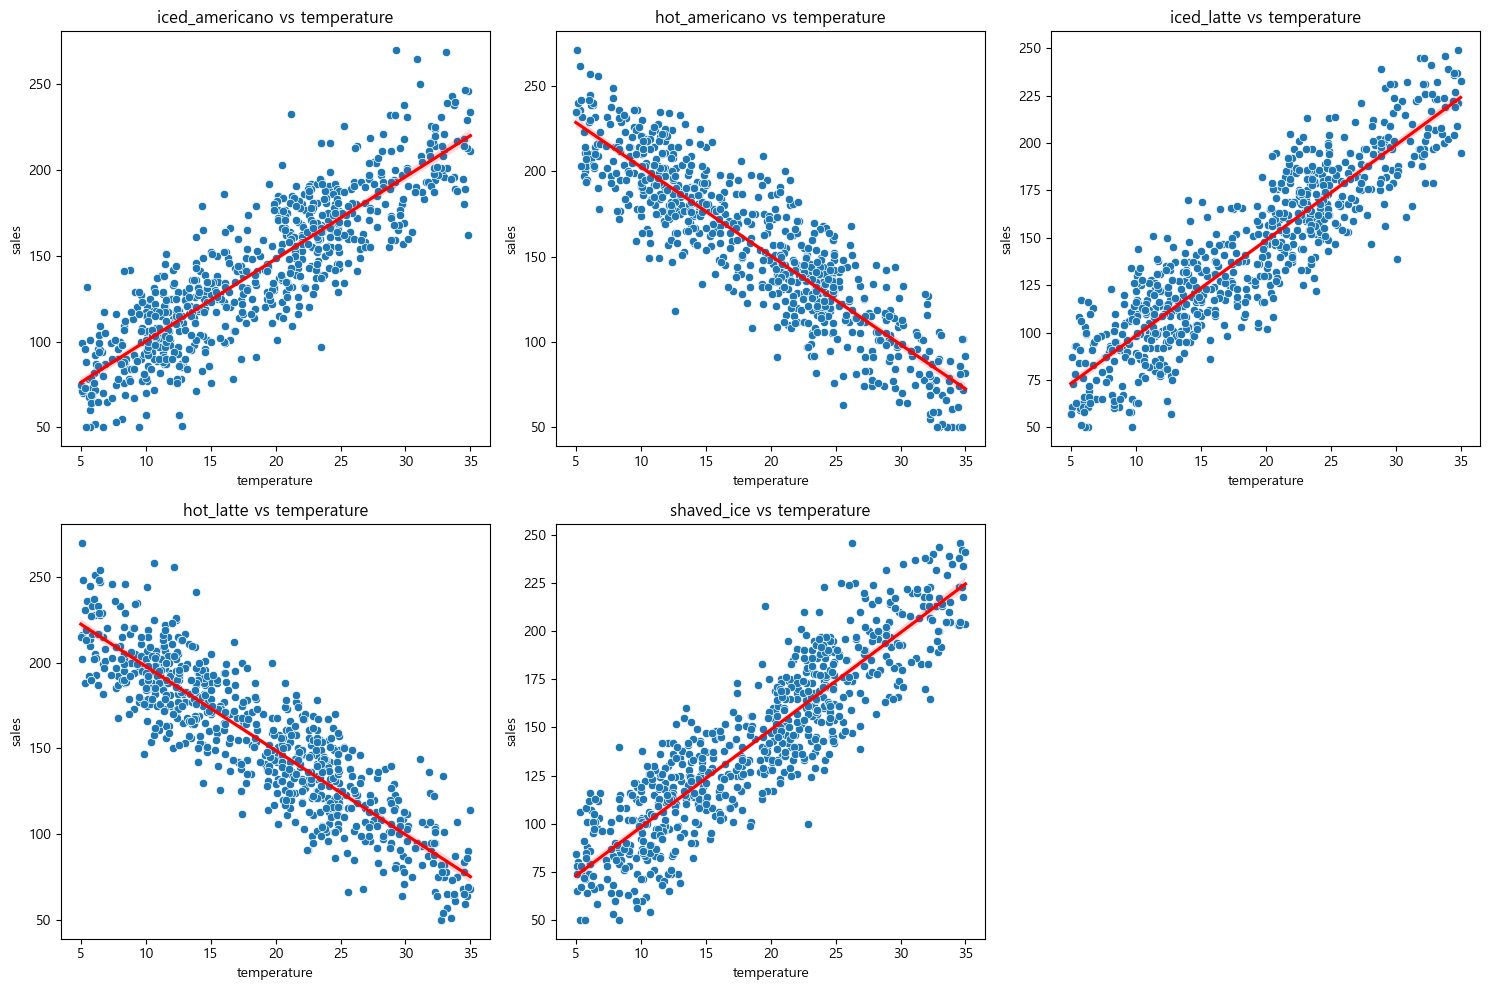

In [9]:
beverages = ['iced_americano',
       'hot_americano', 'iced_latte', 'hot_latte', 'shaved_ice']
plt.figure(figsize=(15,10))
for i , beverage in enumerate(beverages):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x='temperature', y=beverage, data=df)
    sns.regplot(x='temperature', y=beverage, data=df, scatter=False, color='red')
    plt.title(f'{beverage} vs temperature')
    plt.xlabel('temperature')
    plt.ylabel('sales')
plt.tight_layout()

### **3.2024년 일일 판매량 추이 시각화**
- 2024년 날짜별 아아, 핫아 판매량 추이를 선 그래프로 출력
- 계절이나 특정 이벤트에 따른 수요 변화를 시각화

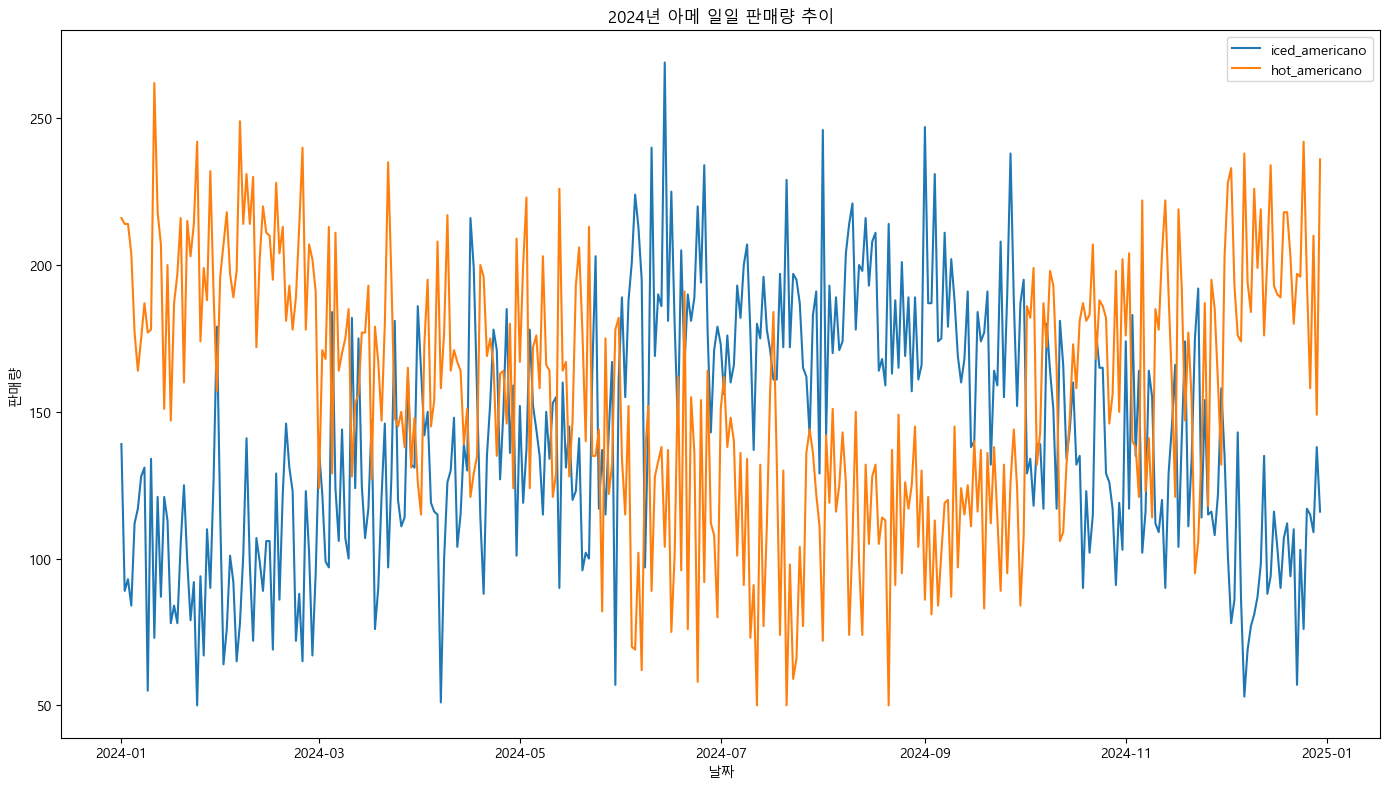

In [10]:
df_2024 = df[df['date'].dt.year == 2024]
df_2024 = df_2024.sort_values('date') # 정렬
plt.figure(figsize=(14, 8))
for column in ['iced_americano','hot_americano']:
    plt.plot(df_2024['date'], df_2024[column], label=column)
plt.title('2024년 아메 일일 판매량 추이')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.legend()
plt.tight_layout()

### **4. 기상요소와 음료간 상관관계 히트맵**
- heatmap은 변수 간의 상관관계를 시각적으로 한눈에 확인 할 수 있음, 양의상관관계(붉은), 음의(파란) 으로 출력`coolwarm`

C:\Users\202-13\anaconda3\envs\tech9\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\202-13\anaconda3\envs\tech9\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\202-13\anaconda3\envs\tech9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


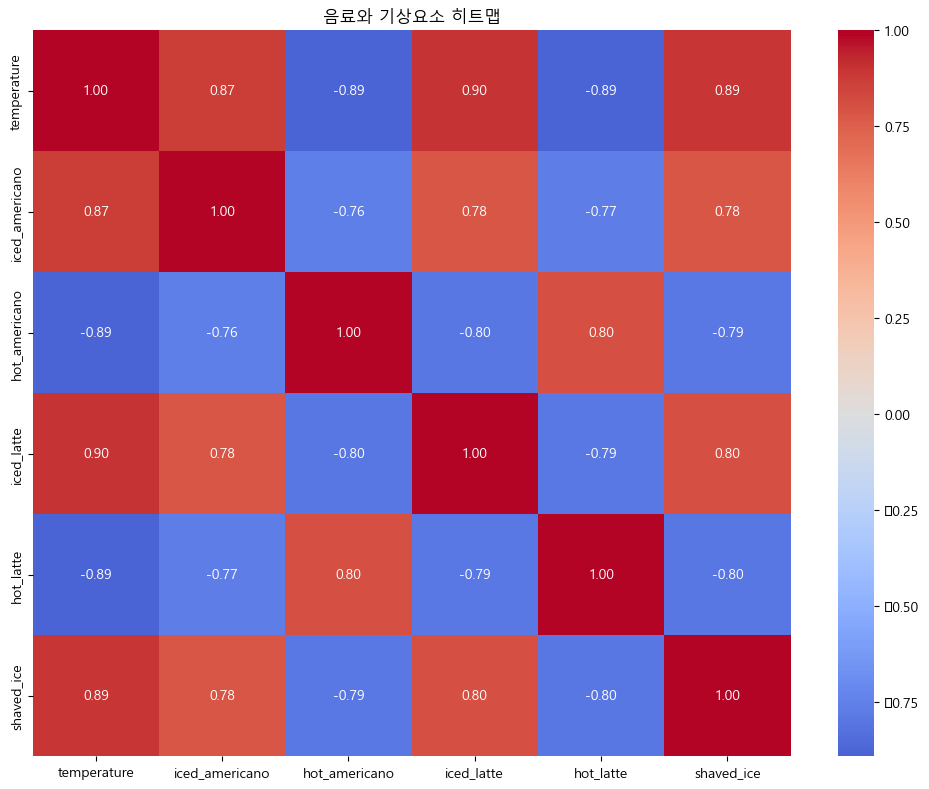

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('음료와 기상요소 히트맵')
plt.tight_layout()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import numpy as np

x = df[['temperature', 'humidity', 'precipitation']]
y = df[['iced_americano',
       'hot_americano', 'iced_latte', 'hot_latte', 'shaved_ice']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
# 성능 평가
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"model evaluation: mse : {mse}, r^2 :{r2}")
# MSE : 예측값과 실제값 간의 차이 제곱 평균값 (작을 수록 좋음)
# R^2 score: 모델이 타켓 변수의 변동성을 얼마나 잘 설명하는지 보여주는 지표,
#             1에 가까울 수록 설명력이 높음

model evaluation: mse : 407.1032747803508, r^2 :0.8161488340965068


In [13]:
# 저장
with open('coffee_model.pkl','wb') as f:
    pickle.dump(model, f)
print('save!')

save!


In [14]:
# 모델 로드
with open('coffee_model.pkl', 'rb') as f:
    load_model = pickle.load(f)
# 테스트
input_data = np.array([[27, 13, 0]])
pred = load_model.predict(input_data)
pred

C:\Users\202-13\anaconda3\envs\tech9\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[176.52734245, 110.20767445, 176.45021859, 110.96351012,
        178.73528791]])